<a href="https://colab.research.google.com/github/ManshaP/CCEES/blob/master/exercise_2/1_second_iterate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

In [0]:
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import numpy as np
%matplotlib inline

## 1. Second Iterate

Logistic map:

\begin{align*}
f(u_i)=u_{i+1} = \mu\ u_i\ (1-u_i)
\end{align*}

Second iterate of te logistic map:

\begin{align*}
f^2(u)  =f \left( f\left(u\right) \right) = \mu^2 \ u \ (1-u)\ \left[ 1-\mu\ u \ (1-u) \right]
\end{align*}

New map:

\begin{align*}
u_{i+1}  = f^2(u_i)
\end{align*}

### a)

The map from the second iterate only conatins every second point in the sequence of the logistic map. Therefore, before the first bifucation point, the second iterate's sequence also has one attractor. After the first bifurcation, it has two attractors.

After the first bifucation, the sequence of the logistic map can be thought of as

\begin{align*}
1,2,1,2,1,2,1,...
\end{align*}

If we take every second element from this, dependent on the initial condition, we get

\begin{align*}
1,1,1,1,1,...
\end{align*}

or

\begin{align*}
2,2,2,2,2,...
\end{align*}

The same is true after more bifucations. The logistic sequence after the second one is

\begin{align*}
1,2,3,4,1,2,3,4,1,2,3,4,1,2,3,4,...
\end{align*}

From this we get the second iterate's sequences 

\begin{align*}
1,3,1,3,1,3,...
\end{align*}

and

\begin{align*}
2,4,2,4,2,4,...
\end{align*}

Two different inital conditions can result in two different sequences ($1,3,1,3,...$ and $3,1,3,1,...$) that are out of phase, but belong to the same attractor.

In the chaotic regime, the order of the iterate is irelevant. The point, at which the chatoic regime start is always the same. Because in the chaotic regime, the sequence of the logistic map is uncorrelated, the same is true for its higher order iterates.

### b)

In [0]:
# define logistic map
def logistic_map(u, mu):
    return mu * u * (1 - u)

# define second iterate of logistic map
def second_iterate_map(u, mu):
    return mu**2 * u * (1 - u) * (1 - mu * u * (1 - u))

# calculate multiple iterates at once
def first_two_iterates(mus, u_0s, steps=100):
    out = {}
    for mu in mus:
        u = np.linspace(0, 1, 400)
        out[mu] = {}
        
        # get u_i+1 dependence on u_i
        first_iterate = logistic_map(u, mu)
        second_iterate = second_iterate_map(u, mu)
        out[mu]['u_u_graph'] = [u, first_iterate, second_iterate]
        
        # get u_i dependence on 'time'
        out[mu]['u_steps'] = {}
        for u_0 in u_0s:
            out[mu]['u_steps'][u_0] = []
            u = u_0
            for i in range(steps):
                out[mu]['u_steps'][u_0].append(u)
                u = second_iterate_map(u, mu)
    return out

In [0]:
# calculate with given parameters

mus = [2., 3.1, 3.5, 3.55, 3.8]
u_0s = [.3, .31, .8, .9]
sim = first_two_iterates(mus, u_0s)

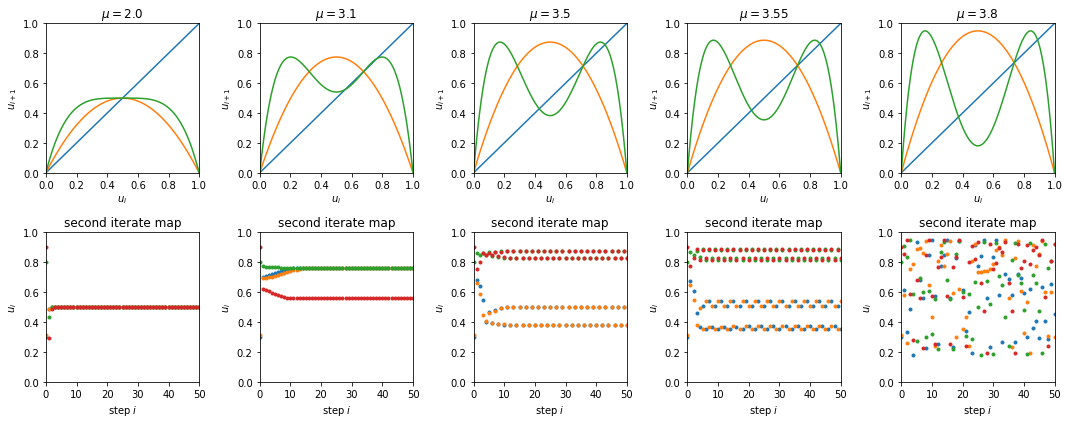

In [4]:
# plot results

n_mu = len(mus)

fig = plt.figure()

axs = []
for i in range(n_mu):
    axs.append([])
    axs[-1].append(plt.subplot2grid((2, n_mu), (0, i)))
    axs[-1].append(plt.subplot2grid((2, n_mu), (1, i)))
        
for i, mu in enumerate(sim.keys()):
    
    for iterate in sim[mu]['u_u_graph']:
        axs[i][0].plot(sim[mu]['u_u_graph'][0], iterate)
        
    axs[i][0].set_title(r'$\mu = {}$'.format(mu))
    axs[i][0].set_xlim(0, 1)
    axs[i][0].set_ylim(0, 1)
    axs[i][0].set_xlabel(r'$u_i$')
    axs[i][0].set_ylabel(r'$u_{i+1}$')
        
    for u_0, u_i in sim[mu]['u_steps'].items():
        axs[i][1].plot(u_i, linestyle='none', marker='.')
        
    axs[i][1].set_title(r'second iterate map')
    axs[i][1].set_ylim(0, 1)
    axs[i][1].set_xlim(0, 50)
    axs[i][1].set_xlabel(r'step $i$')
    axs[i][1].set_ylabel(r'$u_i$')
        
fig.set_size_inches(15, 6)
fig.tight_layout()
plt.show()

### c)

The behaviour of higher order iterates is very similar to the second iterate. Dependent on the order, up to some value of $\mu$, its sequence only has one attractor. for the $n$'th iterate, ths is up to the point, where the logistic map's sequence has $n$ points.

After this, the $n$'th iterate's sequence has $n$ attractors (like above, where the second iterate had two).


In [0]:
# define n-th iterate of logistic map
def n_iterate_map(n, u, mu):
    if n == 0:
        return u
    elif n == 1:
        return logistic_map(u, mu)
    else:
        return logistic_map(n_iterate_map(n-1, u, mu), mu)
    
# define calculation of multiple iterates at once
def n_iterates(mus, u_0s, iterates=[0, 1, 2, 4], steps=100):
    out = {}
    for mu in mus:
        u = np.linspace(0, 1, 400)
        out[mu] = {} 
        
        # get u_i+1 dependence on u_i
        out[mu]['u_u_graph'] = [u]
        for iterate in iterates:
            nth_iterate = n_iterate_map(iterate, u, mu)
            out[mu]['u_u_graph'].append(nth_iterate)
        
        # get u_i dependence on 'time'
        out[mu]['u_steps'] = {}
        for iterate in iterates:
            out[mu]['u_steps'][iterate] = {}
            for u_0 in u_0s:
                out[mu]['u_steps'][iterate][u_0] = []
                u = u_0
                for i in range(steps):
                    out[mu]['u_steps'][iterate][u_0].append(u)
                    u = n_iterate_map(iterate, u, mu)
    return out

In [0]:
# calculate with given parameters

mus = [2., 3.1, 3.5, 3.55, 3.8]
u_0s = [.1]
iterates = [1, 2, 4, 8]

sim = n_iterates(mus, u_0s, iterates)

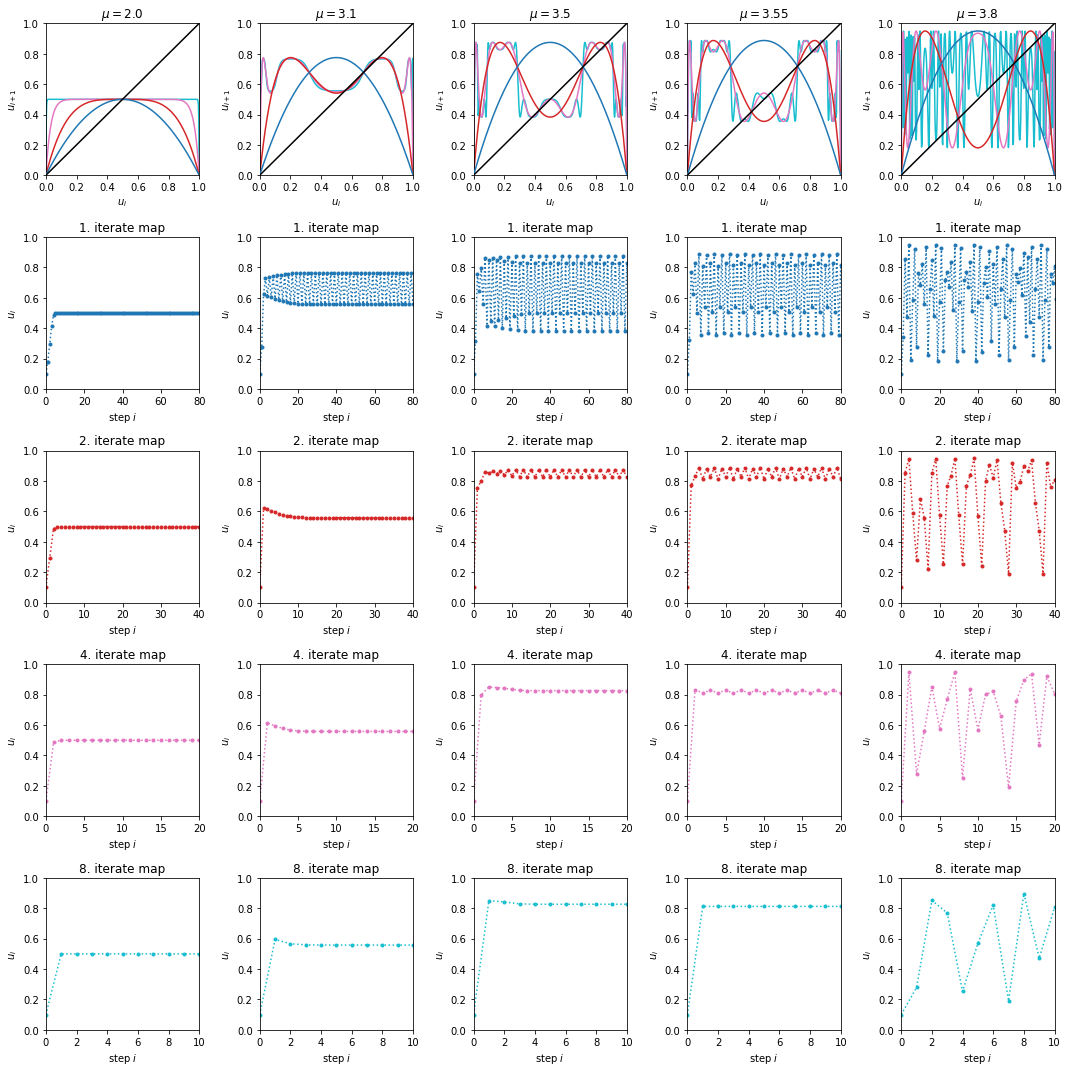

In [11]:
# plot results

n_mu = len(mus)
n_iters = len(iterates)

cmap = get_cmap('tab10')

color_indices = np.linspace(0, 1, n_iters)
colors = ['k'] + [cmap(i) for i in color_indices]

fig = plt.figure()

axs = []
for i in range(n_mu):
    axs.append([])
    axs[-1].append(plt.subplot2grid((n_iters+1, n_mu), (0, i)))
    for j in range(n_iters):
        axs[-1].append(plt.subplot2grid((n_iters+1, n_mu), (j+1, i)))
        
for i, mu in enumerate(sim.keys()):
    
    for i_iter, iterate in enumerate(sim[mu]['u_u_graph']):
        axs[i][0].plot(sim[mu]['u_u_graph'][0], iterate, color=colors[i_iter], zorder=n_iters-i_iter)
        
    axs[i][0].set_title(r'$\mu = {}$'.format(mu))
    axs[i][0].set_xlim(0, 1)
    axs[i][0].set_ylim(0, 1)
    axs[i][0].set_xlabel(r'$u_i$')
    axs[i][0].set_ylabel(r'$u_{i+1}$')
    
    for j, iterate in enumerate(sim[mu]['u_steps'].keys()):
        for u_0, u_i in sim[mu]['u_steps'][iterate].items():
            axs[i][j+1].plot(u_i, linestyle=':', marker='.', color=colors[j+1])
            
        n_iterate = iterates[j]
        
        axs[i][j+1].set_title(r'{}. iterate map'.format(iterate))
        axs[i][j+1].set_ylim(0, 1)
        axs[i][j+1].set_xlim(0, 80//n_iterate)
        axs[i][j+1].set_xlabel(r'step $i$')
        axs[i][j+1].set_ylabel(r'$u_i$')
                
fig.set_size_inches(3 * n_mu, 3 * (n_iters+1))
fig.tight_layout()
plt.show()